<a href="https://colab.research.google.com/github/pena-rodrigo/discount_factor/blob/main/alltrials_discount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

import pylab
pylab.rcParams['savefig.dpi'] = 120

import pickle

import seaborn as sns

In [ ]:
#@title Mount drive
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/MyDrive/hidehiko'


Mounted at /content/gdrive


0.6026607321904576

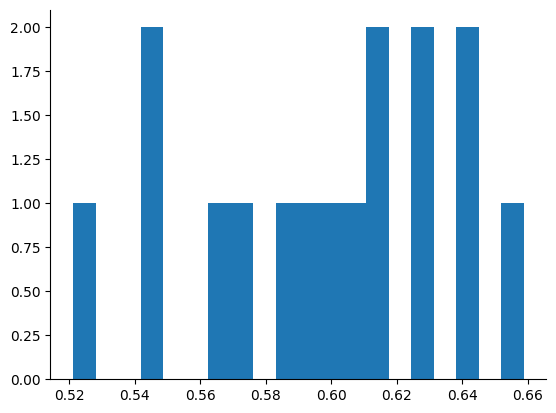

In [ ]:
acc=[]
for i in range(1,17):

  trialtype = np.loadtxt(f"{images_dir}/trialtype" + str(i) + ".dat")
  responsetype = np.loadtxt(f"{images_dir}/responsetype" + str(i) + ".dat")
  trialdelay = np.loadtxt(f"{images_dir}/trialdelay" + str(i) + ".dat")
  amountlarge = np.loadtxt(f"{images_dir}/amountlarge" + str(i) + ".dat")
  amountsmall = np.loadtxt(f"{images_dir}/amountsmall" + str(i) + ".dat")

  count=0
  for i in trialtype:
    if(i==4):
      trialtype[count]=trialtype[count-1]
    count+=1

  params = np.array([3.4023721 ,  4.534483])

  tau = 1
  h = -5
  wi = -7
  wr = 6
  a = 0
  beta = 1

  dt = 1
  tf = len(trialtype)
  I= params[0]

  Iss = lambda c: I + c/2
  Ill = lambda c: I - c/2
  sigma = lambda u : 1. / (1 + np.exp(-beta*(u-a)))

  uss = 0
  ull = 0
  russ=[]
  rull=[]
  response_small = []
  response_large = []
  right_left = []
    #c>0 favor SS, c<0 favor LL
  ci = params[1]
  for i in range(tf):
      if(trialtype[i]==0):
        c = ci + trialdelay[i] - 2*amountsmall[i]/amountlarge[i]
      else:
        c = -ci + trialdelay[i] - 2*amountsmall[i]/amountlarge[i]
      uss = uss + dt*(-uss + h + wr*sigma(uss) + wi*sigma(ull) + Iss(c))/tau + 0.5*np.random.normal()*np.sqrt(dt)/tau
      ull = ull + dt*(-ull + h + wr*sigma(ull) + wi*sigma(uss) + Ill(c))/tau + 0.5*np.random.normal()*np.sqrt(dt)/tau
      russ.append(uss)
      rull.append(ull)
      if(ull<0 and uss>0):
        response_small.append(c)
        response_large.append(np.NaN)
      elif(ull>0 and uss<0):
        response_large.append(c)
        response_small.append(np.NaN)
      else:
        response_large.append(np.NaN)
        response_small.append(np.NaN)

      right_left.append(c)

  comparelist = np.zeros(len(responsetype))
  comparelist[np.where(np.asarray(response_large)>0)] = 2
  comparelist[np.where(np.asarray(response_large)<0)] = 2
  comparelist[np.where(np.asarray(response_small)>0)] = 1
  comparelist[np.where(np.asarray(response_small)<0)] = 1

  total = np.sum(comparelist==0)
  accuracy = np.sum(comparelist==responsetype)/(len(comparelist) - total)

  acc.append(accuracy)
plt.hist(acc,bins=20);
np.median(acc)

Text(0.5, 0, 'Accuracy')

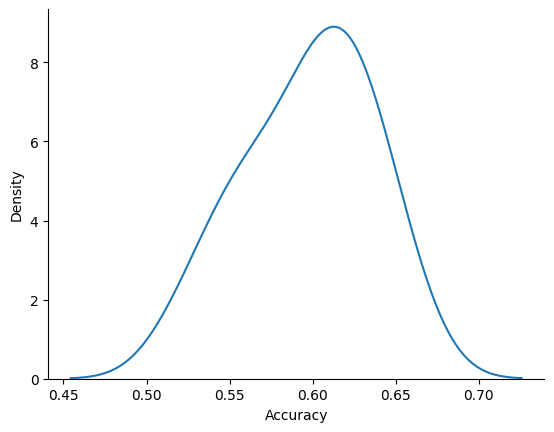

In [ ]:
sns.kdeplot(acc)
plt.xlabel('Accuracy')

Text(0, 0.5, 'Accuracy')

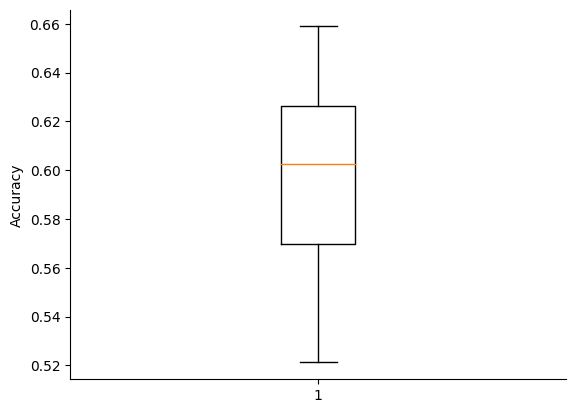

In [ ]:
plt.boxplot(acc);
plt.ylabel('Accuracy')

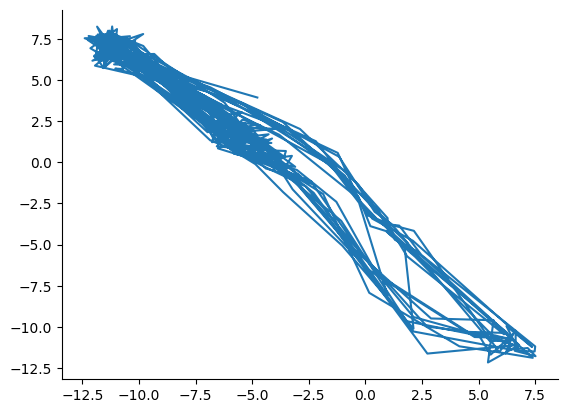

In [ ]:
plt.plot(russ,rull)

(0.0, 80.0)

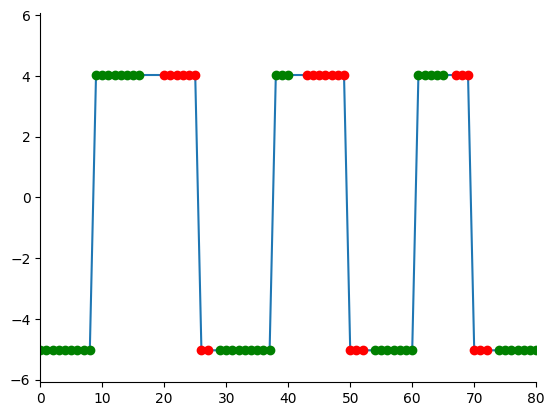

In [ ]:
plt.plot(right_left)
plt.plot(response_large,'go')
plt.plot(response_small,'ro')
plt.xlim([0,80])